### Aplicação do Modelo SIR com Dinâmica Vital, solução numérica por Runge Kutta de Quarta Ordem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
# Parameters
beta = 0.13    # Infection rate
gamma = 0.1   # Recovery rate
mu_s = 0.01    # Susceptible mortality rate
mu_i = 0.02    # Infected mortality rate
eta = 0.01    # Birth rate
P = 100       # Total population size

# Initial conditions
S0 = 98.8   # Initial susceptible population (90% of the total population)
I0 = 1.2  # Initial infected population (1% of the total population)
R0 = 0.0   # Initial recovered population
 
# Time parameters
t_max = 365
dt = 0.1
 
# Initialize lists to store the results
S_list = [S0]
I_list = [I0]
R_list = [R0]
T = [0]
 
# Runge-Kutta 4th Order Method
for t in np.arange(0, t_max, dt):
    prev_S = S_list[-1]
    prev_I = I_list[-1]
    prev_R = R_list[-1]
 
    k1_S = dt * (-beta / P * prev_S * prev_I + (eta - mu_s) * prev_S)
    k1_I = dt * (beta / P * prev_S * prev_I - gamma * prev_I - mu_i * prev_I)
    k1_R = dt * (gamma * prev_I)
    k2_S = dt * (-beta / P * (prev_S + 0.5 * k1_S) * (prev_I + 0.5 * k1_I) + (eta - mu_s) * (prev_S + 0.5 * k1_S))
    k2_I = dt * (beta / P * (prev_S + 0.5 * k1_S) * (prev_I + 0.5 * k1_I) - gamma * (prev_I + 0.5 * k1_I) - mu_i * (prev_I + 0.5 * k1_I))
    k2_R = dt * (gamma * (prev_I + 0.5 * k1_I))
    k3_S = dt * (-beta / P * (prev_S + 0.5 * k2_S) * (prev_I + 0.5 * k2_I) + (eta - mu_s) * (prev_S + 0.5 * k2_S))
    k3_I = dt * (beta / P * (prev_S + 0.5 * k2_S) * (prev_I + 0.5 * k2_I) - gamma * (prev_I + 0.5 * k1_I) - mu_i * (prev_I + 0.5 * k1_I))
    k3_R = dt * (gamma * (prev_I + 0.5 * k1_I))
    k4_S = dt * (-beta / P * (prev_S + k3_S) * (prev_I + k3_I) + (eta - mu_s) * (prev_S + k3_S))
    k4_I = dt * (beta / P * (prev_S + k3_S) * (prev_I + k3_I) - gamma * (prev_I + k3_I) - mu_i * (prev_I + k3_I))
    k4_R = dt * (gamma * (prev_I + k3_I))
    new_S = prev_S + (1/6) * (k1_S + 2 * k2_S + 2 * k3_S + k4_S)
    new_I = prev_I + (1/6) * (k1_I + 2 * k2_I + 2 * k3_I + k4_I)
    new_R = prev_R + (1/6) * (k1_R + 2 * k2_R + 2 * k3_R + k4_R)
    new_t = T[-1] + dt    

    S_list.append(new_S)
    I_list.append(new_I)
    R_list.append(new_R)
    T.append(new_t)
    
# Normalização dos valores do nosso modelo com base em dados reais.
S_lista = []
I_lista = []
R_lista = []
for i in I_list:
    i *= 0.1 #Normalização para percentual da população real
    I_lista.append(i)
# print(I_lista)
for r in R_list:
    r *= 0.1 #Normalização para percental da população real
    R_lista.append(r)
for _ in S_list:
    S_lista.append(P -(I_lista[S_list.index(_)]+R_lista[S_list.index(_)])) #Normalização para percentual da população

#### Plot dos resultados em gráficos.

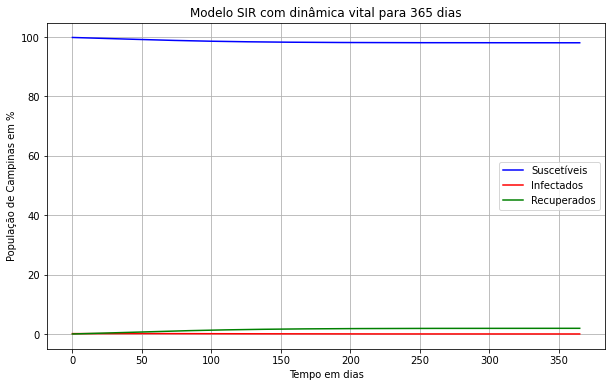

In [2]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(T, S_lista, label="Suscetíveis", color = "blue")
plt.plot(T, I_lista, label="Infectados", color = "red")
plt.plot(T, R_lista, label="Recuperados", color = "green")
plt.xlabel("Tempo em dias")
plt.ylabel("População de Campinas em %")
plt.title("Modelo SIR com dinâmica vital para 365 dias")
plt.legend()
plt.grid()

# plt.savefig("ModeloSIR")

plt.show()

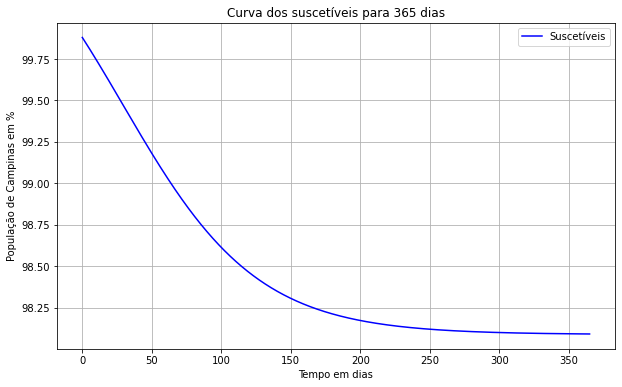

In [3]:
plt.figure(figsize=(10, 6))

plt.plot(T, S_lista, label="Suscetíveis", color = "blue")


plt.xlabel("Tempo em dias")

plt.ylabel("População de Campinas em %")

plt.title("Curva dos suscetíveis para 365 dias")

plt.legend()

plt.grid()

# plt.savefig("CurvaS")

plt.show()

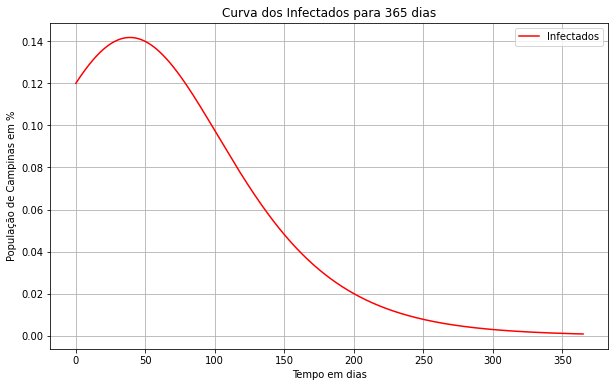

In [4]:
plt.figure(figsize=(10, 6))

# plt.plot(T, S_lista, label="Suscetíveis")

plt.plot(T, I_lista, label="Infectados", color = "red")

# plt.plot(T, R_lista, label="Recuperados")

plt.xlabel("Tempo em dias")

plt.ylabel("População de Campinas em %")

plt.title("Curva dos Infectados para 365 dias")

plt.legend()

plt.grid()

# plt.savefig("CurvaI")

plt.show()

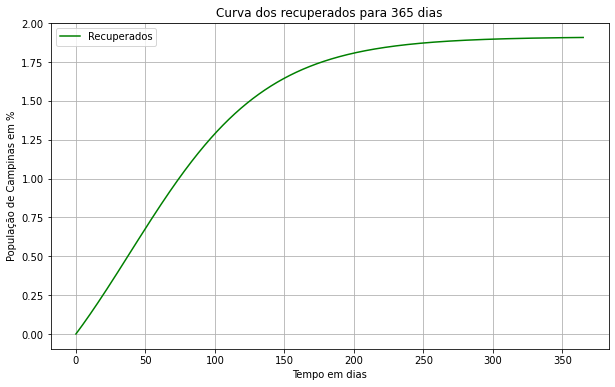

In [5]:
plt.figure(figsize=(10, 6))

# plt.plot(T, S_lista, label="Suscetíveis")

# plt.plot(T, I_lista, label="Infectados")

plt.plot(T, R_lista, label="Recuperados", color = "green")

plt.xlabel("Tempo em dias")

plt.ylabel("População de Campinas em %")

plt.title("Curva dos recuperados para 365 dias")

plt.legend()

plt.grid()

# plt.savefig("CurvaR")

plt.show()

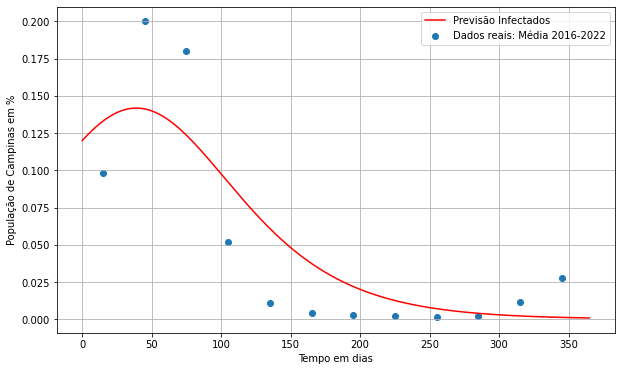

In [6]:
listamedia = [9.82E-02,2.00E-01,1.80E-01,5.17E-02,1.11E-02,4.32E-03,3.12E-03,2.22E-03,1.60E-03,1.95E-03,1.14E-02,2.78E-02]
lista2022 = [9.85E-02,3.27E-01,3.32E-01,9.37E-02,3.22E-02,1.80E-02,9.48E-03,7.74E-03,4.78E-03,5.83E-03,1.77E-02,6.18E-02]
lista2021 = [4.57E-02,7.49E-02,4.47E-02,9.91E-03,2.35E-03,1.91E-03,1.22E-03,1.13E-03,1.57E-03,2.17E-03,5.13E-03,1.27E-02]
lista2023 = [2.48E-01,2.71E-01,2.33E-01,8.88E-02,5.48E-03]

temp = [15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315, 345]
temp_2023 = [15,45,75,105,135]

plt.figure(figsize=(10, 6))

plt.plot(T, I_lista, label="Previsão Infectados", color = "red")

plt.scatter(temp, listamedia, label="Dados reais: Média 2016-2022")

plt.xlabel("Tempo em dias")

plt.ylabel("População de Campinas em %")

# plt.title("Previsão do modelo para infectados e Média de casos entre 2016 e 2022")

plt.legend()

plt.grid()

plt.savefig("CurvaIMedia")

plt.show()

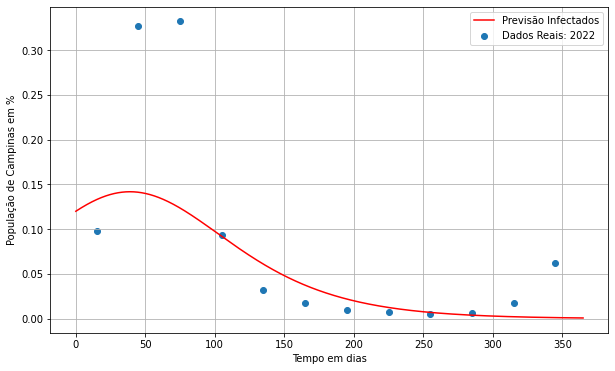

In [7]:
plt.figure(figsize=(10, 6))

plt.plot(T, I_lista, label="Previsão Infectados", color = "red")

plt.scatter(temp, lista2022, label="Dados Reais: 2022")

plt.xlabel("Tempo em dias")

plt.ylabel("População de Campinas em %")

# plt.title("Previsão do modelo para infectados e dados reais para 2022")

plt.legend()

plt.grid()

plt.savefig("CurvaI2022")

plt.show()

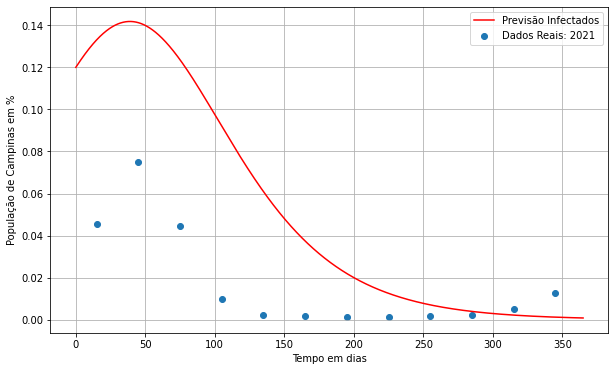

In [8]:
plt.figure(figsize=(10, 6))

plt.plot(T, I_lista, label="Previsão Infectados", color = "red")

plt.scatter(temp, lista2021, label="Dados Reais: 2021")

plt.xlabel("Tempo em dias")

plt.ylabel("População de Campinas em %")

# plt.title("Previsão do modelo para infectados e dados reais para 2021")

plt.legend()

plt.grid()

plt.savefig("CurvaI2021")

plt.show()

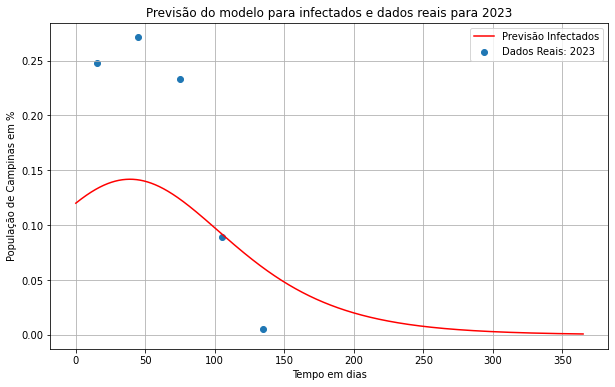

In [9]:
plt.figure(figsize=(10, 6))

plt.plot(T, I_lista, label="Previsão Infectados", color = "red")

plt.scatter(temp_2023, lista2023, label="Dados Reais: 2023")

plt.xlabel("Tempo em dias")

plt.ylabel("População de Campinas em %")

plt.title("Previsão do modelo para infectados e dados reais para 2023")

plt.legend()

plt.grid()

# plt.savefig("CurvaI2023")

plt.show()